# Final Project Report

* Class: DS 5100
* Student Name: Brian Nolton
* Student Net ID: frv3fp
* This URL: https://github.com/bnolton/Monte_Carlo_Simulator/blob/main/Monte_Carlo_Simulator/bnolton_DS5100_FinalProject.ipynb

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL:

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

In [7]:
'''
import numpy as np
import pandas as pd


class Die():
    """
    A class representing a die with customizable faces and weights.

    This class creates a die object that can have arbitrary face values and weights.
    The faces must be unique and are stored in a numpy array. Each face has an
    associated weight that affects the probability of rolling that face.

    Attributes:
        sides (numpy.ndarray): Array of unique face values for the die
        die (pandas.DataFrame): DataFrame storing faces as index and their weights

    Methods:
        change_face_weight(face, new_weight): Changes the weight of a specific face
        roll_die(r=1): Rolls the die r times and returns results
        die_state(): Prints current state of die faces and weights
    """

    def __init__(self, sides):
        """
        Initialize a Die object with given sides.

        Parameters:
        -----------
        sides : numpy.ndarray
            Array of unique values representing the faces of the die

        Raises:
        -------
        TypeError
            If sides is not a numpy array
        ValueError
            If the array has repeated sides
        """

        self.sides = sides
        # if it is a numpy array#
        if isinstance(sides, np.ndarray):
            # test for uniqueness#
            if len(self.sides) == len(set(self.sides)):
                # set up weights variable#
                weights = np.array([1])
                # make weights same length as sides#
                while len(weights) < len(self.sides):
                    weights = np.append(weights, 1)
                # set up dataframe#
                self.die = pd.DataFrame({'Faces': self.sides, 'Weights': weights})
                self.die.set_index('Faces', inplace=True)
            else:
                raise ValueError('The array has repeated sides')
        else:
            raise TypeError('Sides is not a numpy array')

    def change_face_weight(self, face, new_weight):
        """
        Change the weight of a specified face of the die.

        Parameters:
        -----------
        face : any
            The face value to modify (must exist in die faces)
        new_weight : float
            The new weight to assign to the face

        Raises:
        -------
        IndexError
            If the specified face is not on the die
        TypeError
            If the new weight is not numeric
        """

        if face in self.sides:
            if new_weight == float(new_weight):
                try:
                    # Check to see if new_weight is the right value type.#
                    new_weight = float(new_weight)
                except(ValueError, TypeError):
                    raise TypeError('The weight of the face must be numeric')
                self.die.loc[face, 'Weights'] = new_weight
        else:
            raise IndexError('This face is not on the die')

    def roll_die(self, r=1):
        """
        Roll the die one or more times.

        Parameters:
        -----------
        r : int, optional
            Number of times to roll the die (default is 1)

        Returns:
        --------
        list
            Results of the die rolls based on face weights
        """

        probs = self.die['Weights'] / self.die['Weights'].sum()
        die_roll = list(np.random.choice(self.die.index, size=r, p=probs))
        return die_roll

    def die_state(self):
        """
        Show the current state of the die.

        Returns:
        --------
        None
            Prints the DataFrame showing faces and their weights
        """

        print(self.die)


class Game():
    """
    A class to simulate rolling multiple dice and store the results.

    Attributes:
        dice (list): A list of Die objects to be used in the game
        results (DataFrame): A DataFrame containing the results of the dice rolls, where each column represents a die and each row represents a roll

    Methods:
        play(n_rolls): Rolls all dice n_rolls times and stores results
        show(form): Returns the results in either 'wide' or 'narrow' format
    """

    def __init__(self, dice):
        """Initialize a new dice game.

        Parameters:
        -----------
        dice : list
             A list of Die objects to be used in the game

        Returns:
        --------
        None
        """

        self.dice = dice
        self.results = None

    def play(self, n_rolls):
        """Play the dice game by rolling all dice n_rolls times.

        Parameters:
        -----------
        n_rolls : int
            The number of times to roll all the dice

        Returns:
        --------
        None
            Results are stored in self.results DataFrame
        """

        # Store the results#
        results = {f'die_{i}': Die.roll_die(n_rolls)
                   for i, Die in enumerate(self.dice, 1)}
        # Create DataFrame with roll numbers as index#
        self.results = pd.DataFrame(results, index=[f'roll_{i + 1}' for i in range(n_rolls)])

    def show(self, form='wide'):
        """Display the results of the dice game.

        Parameters:
        -----------
        form : str, optional
            Format of the results, either 'wide' or 'narrow' (default is 'wide')
            - 'wide': Each die roll is a column
            - 'narrow': Results are melted into a long format with die number and outcome columns

        Returns:
        --------
        pandas.DataFrame
            DataFrame containing the results in the specified format

        Raises:
        -------
        ValueError
            If no games have been played or if form is not 'wide' or 'narrow'
        """

        if self.results is None:
            raise ValueError("No games have been played yet")

        if form.lower() not in ['wide', 'narrow']:
            raise ValueError("Form must be 'wide' or 'narrow'")

        if form.lower() == 'wide':
            return self.results
        else:
            return self.results.melt(ignore_index=False, var_name='die', value_name='outcome').set_index('die', append=True)


class Analyzer:
    """
    A class to analyze the results of a dice game.

    This class provides methods to analyze various aspects of dice game results, including counting jackpots (all dice showing same face), counting face occurrences, and analyzing combinations and permutations of dice outcomes.

    Methods:
        jackpot(): Returns the number of rolls that resulted in all dice showing the same face
        face_counts(): Returns a DataFrame showing the count of each face value per roll
        combo_count(): Returns counts of unique combinations of faces (order doesn't matter)
        permu_count(): Returns counts of unique permutations of faces (order matters)
    """
    def __init__(self, game):
        if not isinstance(game, Game):
            raise ValueError("Input must be a Game object.")
        self.game = game

    def jackpot(self):
        """
        Counts the number of rolls where all dice show the same face.

        Returns:
        --------
            int: Number of jackpots (rolls with all matching faces)
        """
        outcome = self.game.show()
        return sum(outcome.nunique(axis=1) == 1)

    def face_counts(self):
        """
        Computes how many times each face appears in each roll.

        Returns:
        --------
            DataFrame: Index shows roll numbers, columns show possible faces, values show count of each face in that roll
        """
        outcome = self.game.show()
        faces = pd.unique(outcome.values.ravel())
        counts = pd.DataFrame(index=outcome.index, columns=faces)
        for face in faces:
            counts[face] = (outcome == face).sum(axis=1)
        return counts

    def combo_count(self):
        """
        Computes distinct combinations of faces rolled and their frequencies.
        Combinations are order-independent (sorted).

        Returns:
        --------
            DataFrame: Index shows distinct combinations, column shows count of occurrences
        """
        outcome = self.game.show()
        combos = outcome.apply(lambda x: tuple(sorted(x.values)), axis=1)
        return pd.DataFrame(combos.value_counts(), columns=['count'])

    def permu_count(self):
        """
        Computes distinct permutations of faces rolled and their frequencies.
        Permutations are order-dependent (unsorted).

        Returns:
        --------
            DataFrame: Index shows distinct permutations, column shows count of occurrences
        """
        outcome = self.game.show()
        permus = outcome.apply(lambda x: tuple(x.values), axis=1)
        return pd.DataFrame(permus.value_counts(), columns=['count'])
'''

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

In [2]:
'''
import unittest
import pandas as pd
import numpy as np
from Monte_Carlo_Sim import Die, Game, Analyzer


class TestDie(unittest.TestCase):

    def test_Die_init(self):
        coin = np.array(['H', 'T'])
        self.die = Die(coin)
        self.assertTrue(isinstance(coin, np.ndarray))
        self.assertEqual(len(self.die.die), 2)
        self.assertEqual(list(self.die.die.index), ['H', 'T'])

    def test_change_face_weight(self):
        coin = np.array(['H', 'T'])
        self.die = Die(coin)
        self.die.change_face_weight('H', 2)
        self.assertEqual(self.die.loc[1, 'Weights'], 2)

    def test_roll_die(self):
        coin = np.array(['H', 'T'])
        self.die = Die(coin)
        rolls = self.die.roll_die(10)
        self.assertEqual(len(rolls), 10)
        self.assertTrue(all(face in ['H', 'T'] for face in rolls))


class TestGame(unittest.TestCase):

    def test_Game_init(self):
        coin = np.array(['H', 'T'])
        die1 = Die(coin)
        die2 = Die(coin)
        self.game = Game([die1, die2])
        self.assertIsNone(self.game.results)
        self.assertEqual(len(self.game.dice), 2)

    def test_play(self):
        coin = np.array(['H', 'T'])
        die1 = Die(coin)
        die2 = Die(coin)
        self.game = Game([die1, die2])
        self.game.play(10)
        self.assertIsInstance(self.game.results, pd.DataFrame)
        self.assertEqual(len(self.game.results), 10)
        self.assertEqual(len(self.game.results.columns), 2)

    def test_show_wide(self):
        coin = np.array(['H', 'T'])
        die1 = Die(coin)
        die2 = Die(coin)
        self.game = Game([die1, die2])
        self.game.play(10)
        result = self.game.show('wide')
        self.assertIsInstance(result, pd.DataFrame)
        self.assertEqual(result.shape, (10, 2))

    def test_show_narrow(self):
        coin = np.array(['H', 'T'])
        die1 = Die(coin)
        die2 = Die(coin)
        self.game = Game([die1, die2])
        self.game.play(10)
        result = self.game.show('narrow')
        self.assertIsInstance(result, pd.DataFrame)
        self.assertEqual(len(result), 20)  # 10 rolls * 2 dice


class TestAnalyzer(unittest.TestCase):

    def test_init(self):
        coin = np.array(['H', 'T'])
        die1 = Die(coin)
        die2 = Die(coin)
        game = Game([die1, die2])
        game.play(10)
        self.analyzer = Analyzer(game)
        with self.assertRaises(ValueError):
            Analyzer("not a game")

    def test_jackpot(self):
        coin = np.array(['H', 'T'])
        die1 = Die(coin)
        die2 = Die(coin)
        game = Game([die1, die2])
        game.play(10)
        self.analyzer = Analyzer(game)
        result = self.analyzer.jackpot()
        self.assertIsInstance(result, int)
        self.assertTrue(result >= 0)

    def test_face_counts(self):
        coin = np.array(['H', 'T'])
        die1 = Die(coin)
        die2 = Die(coin)
        game = Game([die1, die2])
        game.play(10)
        self.analyzer = Analyzer(game)
        result = self.analyzer.face_counts()
        self.assertIsInstance(result, pd.DataFrame)
        self.assertEqual(len(result.columns), 2)  # H and T

    def test_combo_count(self):
        coin = np.array(['H', 'T'])
        die1 = Die(coin)
        die2 = Die(coin)
        game = Game([die1, die2])
        game.play(10)
        self.analyzer = Analyzer(game)
        result = self.analyzer.combo_count()
        self.assertIsInstance(result, pd.DataFrame)
        self.assertEqual(len(result.columns), 1)
        self.assertTrue('count' in result.columns)

    def test_permu_count(self):
        coin = np.array(['H', 'T'])
        die1 = Die(coin)
        die2 = Die(coin)
        game = Game([die1, die2])
        game.play(10)
        self.analyzer = Analyzer(game)
        result = self.analyzer.permu_count()
        self.assertIsInstance(result, pd.DataFrame)
        self.assertEqual(len(result.columns), 1)
        self.assertTrue('count' in result.columns)


if __name__ == '__main__':
    unittest.main()
'''

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
from Monte_Carlo_Sim import Die, Game, Analyzer

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [3]:
help(Die)
help(Game)
help(Analyzer)

Help on class Die in module Monte_Carlo_Sim:

class Die(builtins.object)
 |  Die(sides)
 |  
 |  A class representing a die with customizable faces and weights.
 |  
 |  This class creates a die object that can have arbitrary face values and weights.
 |  The faces must be unique and are stored in a numpy array. Each face has an
 |  associated weight that affects the probability of rolling that face.
 |  
 |  Attributes:
 |      sides (numpy.ndarray): Array of unique face values for the die
 |      die (pandas.DataFrame): DataFrame storing faces as index and their weights
 |  
 |  Methods:
 |      change_face_weight(face, new_weight): Changes the weight of a specific face
 |      roll_die(r=1): Rolls the die r times and returns results
 |      die_state(): Prints current state of die faces and weights
 |  
 |  Methods defined here:
 |  
 |  __init__(self, sides)
 |      Initialize a Die object with given sides.
 |      
 |      Parameters:
 |      -----------
 |      sides : numpy.ndarr

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/bnolton/Monte_Carlo_Simulator/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [10]:
coin = np.array(['H', 'T'])
c1 = Die(coin)
c2 = Die(coin)
c2.change_face_weight('H',5)

Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [11]:
cg1 = Game([c1,c2])
cg1.play(1000)

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [13]:
cg2 = Game([c1,c2,c2])
cg2.play(1000)

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [24]:
cg1a = Analyzer(cg1)
cg2a = Analyzer(cg2)
print(cg1a.jackpot())
print(cg2a.jackpot())

495
377


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [37]:
cg1j = cg1a.jackpot()/1000
cg2j = cg2a.jackpot()/1000
print(cg1j)
print(cg2j)

0.495
0.377


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

Text(0.5, 1.0, 'Relative Frequenices of Jackpots')

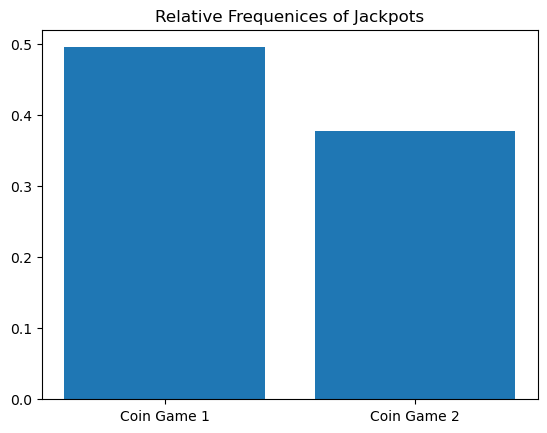

In [47]:
coingames = ('Coin Game 1', 'Coin Game 2')
coinjackpots = {cg1j, cg2j}
plt.bar(coingames, coinjackpots)
plt.title('Relative Frequenices of Jackpots')

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [19]:
d6 = np.array([1,2,3,4,5,6])
d1 = Die(d6)
d2 = Die(d6)
d3 = Die(d6)

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [20]:
d2.change_face_weight(6,5)

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [21]:
d3.change_face_weight(1,5)

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [33]:
dg1 = Game([d1,d1,d1,d1,d1])
dg1.play(10000)

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [34]:
dg2 = Game([d1,d1,d1,d2,d3])
dg2.play(1000)

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

Text(0.5, 1.0, 'Relative Frequenices of Jackpots')

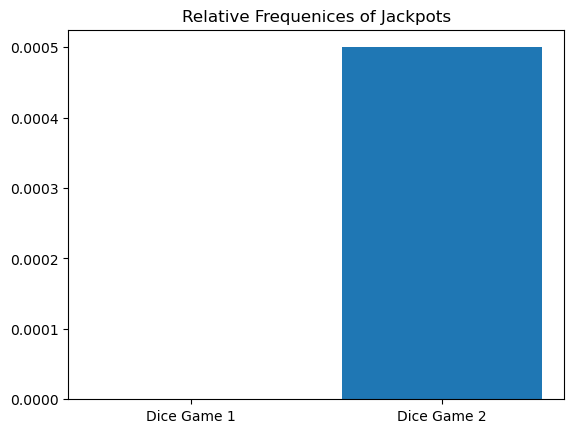

In [46]:
dg1a = Analyzer(dg1)
dg2a = Analyzer(dg2)
dg1j = dg1a.jackpot()/10000
dg2j = dg2a.jackpot()/10000
diegames = ('Dice Game 1', 'Dice Game 2')
diejackpots = {dg1j, dg2j}
plt.bar(diegames, diejackpots)
plt.title('Relative Frequenices of Jackpots')

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [67]:
letters = pd.read_csv('english_letters.txt', delimiter=' ', header=None)
larray = np.array(letters[0])
l = Die(larray)
for letter, weight in zip(letters[0], letters[1]):
    l.change_face_weight(letter, weight)
l.die_state()
#added the last line so you can see it worked :)#

         Weights
Faces           
E      529117365
T      390965105
A      374061888
O      326627740
I      320410057
N      313720540
S      294300210
R      277000841
H      216768975
L      183996130
D      169330528
C      138416451
U      117295780
M      110504544
F       95422055
G       91258980
P       90376747
W       79843664
Y       75294515
B       70195826
V       46337161
K       35373464
J        9613410
X        8369915
Z        4975847
Q        4550166


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [105]:
lg1 = Game([l,l,l,l])
lg1.play(1000)

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [150]:
word = pd.read_csv('scrabble_words.txt', delimiter=' ', header=None)
words = set(word[0])
lg1a = Analyzer(lg1)
lg1pdf = lg1a.permu_count()
lg1p = lg1pdf.index.map(lambda x: ''.join(x))
match1 = lg1p[lg1p.isin(words)]
print(f"There are {len(match1)} words in game 1.")

There are 56 words in game 1.


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [152]:
lg2 = Game([l,l,l,l,l])
lg2.play(1000)
lg2a = Analyzer(lg2)
lg2p = lg2a.permu_count()
lg2pdf = lg2a.permu_count()
lg2p = lg2pdf.index.map(lambda x: ''.join(x))
match2 = lg2p[lg2p.isin(words)]
print(f"There are {len(match2)} words in game 2.")
if len(match1) > len(match2):
    print(f"There are {len(match1) - len(match2)} more words in game 1.")
elif len(match1) < len(match2):
    print(f"There are {len(match2) - len(match1)} more words in game 2.")
else:
    print(f"There are the smae amount of words in game 1 and 2.")

There are 8 words in game 2.
There are 48 more words in game 1.
